<a href="https://colab.research.google.com/github/mwl10/hetvae/blob/errors/src/preprocess_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil#
os.chdir('/content')
if os.path.isdir('./hetvae'):
  shutil.rmtree('./hetvae/')
! git clone --branch errors https://github.com/mwl10/hetvae
os.chdir('/content/hetvae')
! pip install -r requirements.txt
os.chdir('/content/hetvae/src')
import numpy as np
from scipy import signal
from glob import glob
import matplotlib.pyplot as plt
from dataset import DataSet

974
0.1262596507877878
0.375
need to increase outlier mag threshold
0.35
need to increase outlier mag threshold
0.335
need to increase outlier mag threshold
0.325
need to increase outlier mag threshold
0.31
need to increase outlier mag threshold
0.295
need to increase outlier mag threshold
0.29
need to increase outlier mag threshold
0.285
need to increase outlier mag threshold
0.28
need to increase outlier mag threshold
0.275
need to increase outlier mag threshold
0.245
need to increase outlier mag threshold
0.225
need to increase outlier mag threshold
0.205
need to increase outlier mag threshold
0.18
need to increase outlier mag threshold
0.155
need to increase outlier mag threshold
0.155
need to increase outlier mag threshold
0.145
need to increase outlier mag threshold
0.145
need to increase outlier mag threshold
0.145
need to increase outlier mag threshold
0.135
need to increase outlier mag threshold
0.12
need to increase outlier mag threshold
0.115
need to increase outlier mag thr

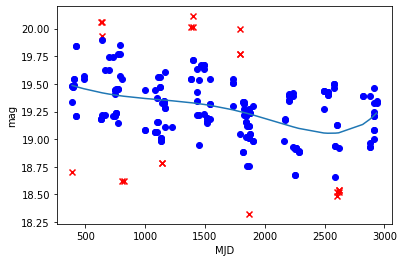

In [14]:
#--------------------------------------------------------------------------------------------------------
# PREPROCESSING, from Catalina data
#--------------------------------------------------------------------------------------------------------

# three point median filter

# clipping of all points that deviated significantly from a quintic polynomial fit to the data 

# clipping threshold was initially set to 0.25 mag and then iteratively increased (if necessary) until no more 
# than 10 percent of the points were rejected

# dataset, glob, np, scipy, matplotlib

lc_files = glob('/content/hetvae/data/CAT/*/*')


Catalina = DataSet() \
            .add_files(lc_files) \
            .files_to_numpy() \
            .handle_dups()

print(len(Catalina.files))

for i, lc in enumerate(Catalina.dataset): 
    if len(lc) < 50:
        del Catalina.files[i]
        del Catalina.dataset[i]
        pass
    lc[:,1] = signal.medfilt(lc[:,1], kernel_size=3)
    quintic_fit = np.polyfit(lc[:,0], lc[:,1], deg=5)
    quintic_y = np.array([lc[:,0]**5, lc[:,0] ** 4, lc[:,0] ** 3, lc[:,0] ** 2 , lc[:,0], np.ones(len(lc))])
    quintic_y = np.matmul(quintic_y.T, quintic_fit)

    print(np.std(quintic_y))
    plt.plot(lc[:,0], quintic_y)
    dev = np.abs(lc[:,1] - quintic_y)


    # increase mag_threshold of outliers if more than 10 percent are removed
    percentage = 1.
    mag_threshold = 0.25
    while(True):
        outliers = np.where(dev >= mag_threshold)[0]
        percentage = len(outliers)/ len(lc) # none past 10 percent 
        print(percentage)
        if percentage > .1:
            print('need to increase outlier mag threshold')
            mag_threshold += 0.01
        else:
            break

    plt.scatter(lc[outliers,0], lc[outliers,1], c='r', marker='x')
    lc = np.delete(lc, outliers, axis=0)
    plt.scatter(lc[:,0], lc[:,1], c='b')
    plt.xlabel('MJD')
    plt.ylabel('mag')
    break